/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  from ipykernel import kernelapp as app


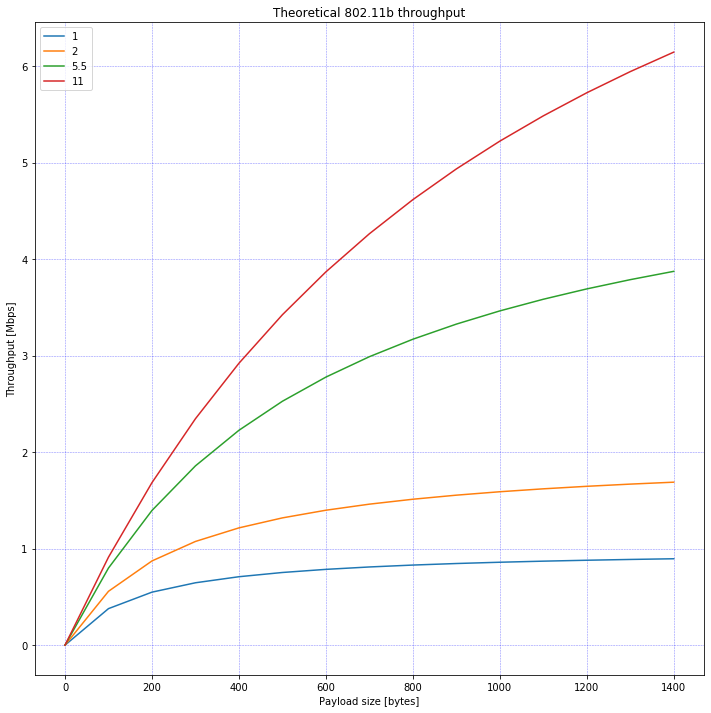

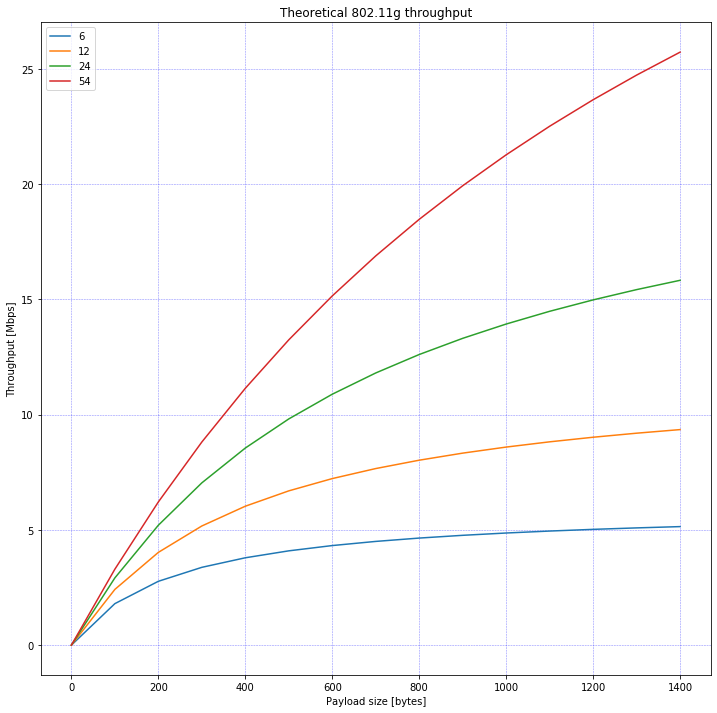

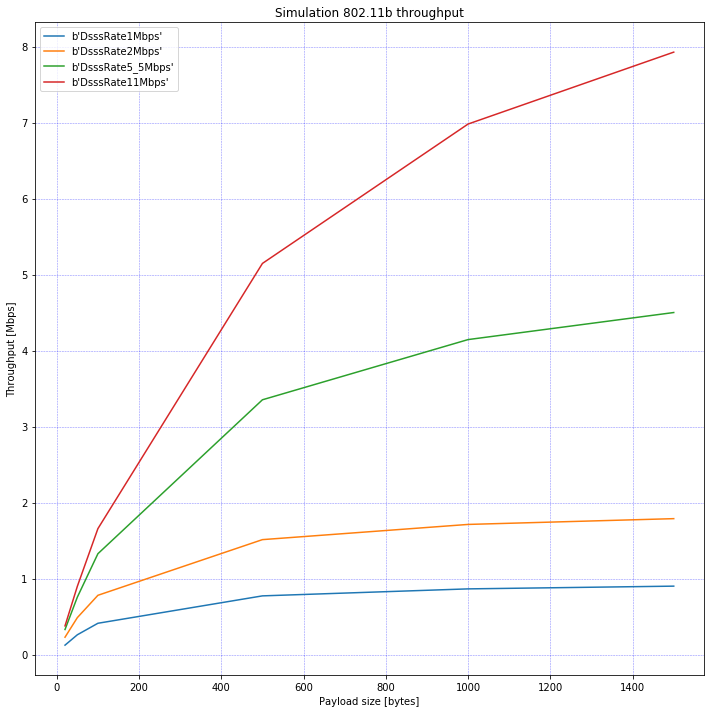

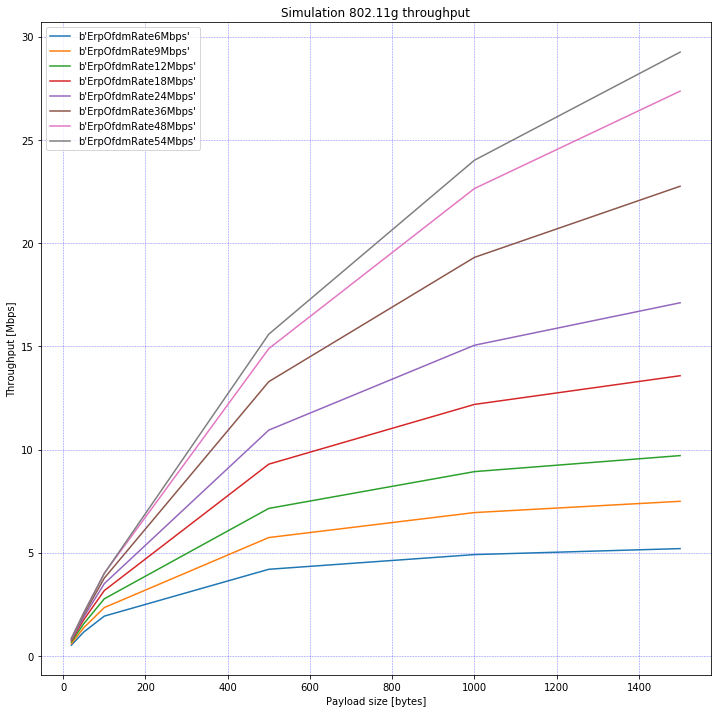

In [5]:
import copy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
 
MCS_802_11_B = [1, 2, 5.5, 11]
MCS_802_11_G = [6, 12, 24, 54]
PAYLOAD_SIZES = [100 * i for i in range(15)]
 
DATA_FILE_802_11_B = '/home/student/ns-3-dev/lab3_3_80211_b.txt'
DATA_FILE_802_11_G = '/home/student/ns-3-dev/lab3_3_80211_g.txt'
columns = ['mcs', 'payload_size', 'throughput']

sim_data_802_11_b = np.genfromtxt(DATA_FILE_802_11_B, delimiter=' ', names=columns, dtype=None)
sim_data_802_11_g = np.genfromtxt(DATA_FILE_802_11_G, delimiter=' ', names=columns, dtype=None)

def compute_throughput_802_11_b(payload_size, mcs):
    return payload_size * 8.0 / (754 + (70 + payload_size) * 8.0 / mcs) 
 
def compute_throughput_802_11_g(payload_size, mcs):
    return payload_size * 8.0 / (217.5 + (70 + payload_size) * 8.0 / mcs) 

 
def plot_theoretical_802_11_b_throughput():
    fig, ax = plt.subplots(figsize=(12,12))
    ax.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
 
    plt.xlabel('Payload size [bytes]')
    plt.ylabel('Throughput [Mbps]')
    plt.title('Theoretical 802.11b throughput')
 
    for mcs in MCS_802_11_B:
        tput_values = [compute_throughput_802_11_b(payload_size, mcs) for payload_size in PAYLOAD_SIZES]
        ax.plot(PAYLOAD_SIZES, tput_values, label='%s' % mcs)
    ax.legend()
 
    plt.savefig("theoretical_80211_b.png")
    plt.show()
 
def plot_theoretical_802_11_g_throughput():
    fig, ax = plt.subplots(figsize=(12,12))
    ax.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
 
    plt.xlabel('Payload size [bytes]')
    plt.ylabel('Throughput [Mbps]')
    plt.title('Theoretical 802.11g throughput')
 
    for mcs in MCS_802_11_G:
        tput_values = [compute_throughput_802_11_g(payload_size, mcs) for payload_size in PAYLOAD_SIZES]
        ax.plot(PAYLOAD_SIZES, tput_values, label='%s' % mcs)
    ax.legend()
 
    plt.savefig("theoretical_80211_g.png")
    plt.show()
 
def plot_simulation_802_11_b_throughput(sim_data):
    fig, ax = plt.subplots(figsize=(12,12))
    ax.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
 
    plt.xlabel('Payload size [bytes]')
    plt.ylabel('Throughput [Mbps]')
    plt.title('Simulation 802.11b throughput')
 
    for i in range(0,len(sim_data), 6):
        ax.plot(sim_data['payload_size'][i:i + 6], sim_data['throughput'][i:i + 6], label=sim_data['mcs'][i])
    ax.legend()
    plt.savefig("simulation_80211_b.png")
    plt.show()

def plot_simulation_802_11_g_throughput(sim_data):
    fig, ax = plt.subplots(figsize=(12,12))
    ax.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
 
    plt.xlabel('Payload size [bytes]')
    plt.ylabel('Throughput [Mbps]')
    plt.title('Simulation 802.11g throughput')
 
    for i in range(0,len(sim_data), 6):
        ax.plot(sim_data['payload_size'][i:i + 6], sim_data['throughput'][i:i + 6], label=sim_data['mcs'][i])
    ax.legend()
    plt.savefig("simulation_80211_g.png")
    plt.show()

if __name__ == '__main__':
    plot_theoretical_802_11_b_throughput()
    plot_theoretical_802_11_g_throughput()
    plot_simulation_802_11_b_throughput(sim_data_802_11_b)    
    plot_simulation_802_11_g_throughput(sim_data_802_11_g)